# 3. Creating Boxplots for the Deposited Data with respect to Phyla
## Objective: 
Create a bar plot to show the number of species with genome assembly data in each spiralian phyla (not including phylums with no information). Show the distribution of assembly sizes and gc content through a boxplot. 

In [1]:
# Import necessary packages 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np 
import pandas as pd

In [2]:
%run helper_functions.ipynb

In [3]:
# Load the metadata and attach the necessary dataframes to the csv. 
metadata = pd.read_csv('metadata-sample.csv') 
metadata = prepareMetadata(metadata)
# Remove duplicate species to keep only the newest assembly. 
#   Note that in newer versions of NCBI's command line tools, the submission date
#   column has been replaced by more precise date columns. 
#   In this update, the metadataNewest function will sort by 'Release_Date' by default
#   but this can be changed using the 'sort_by' parameter. 
metadata = metadataNewest(metadata, sort_by = 'Submission_Date') 

In [4]:
# Filter out assemblies keeping only those with a contig n50 greater than 2500 
metadata = metadata.loc[metadata.Contig_N50>2500] 

In [5]:
# For accessions without scaffold data, keep only accessions with less than 100k contigs 
no_scaffold = metadata.loc[metadata.Number_of_Scaffolds.isna()]
no_scaffold = no_scaffold.loc[no_scaffold.Number_of_Contigs < 100000] 

In [6]:
# For all accessions, keep only accessions with under 150k scaffolds. 
# This automatically removes all accessions with no scaffold data
metadata = metadata.loc[metadata.Number_of_Scaffolds < 150000] 

In [7]:
# Combine the filtered dataframes back into metadata. 
metadata = pd.concat([metadata, no_scaffold]) 

In [8]:
# Determine the order to plot the phyla 
phylum_order = ['Rotifera', 'Acanthocephala', 'Orthonectida', 'Dicyemida', 
                'Platyhelminthes', 'Annelida', 'Mollusca', 
                'Nemertea', 'Brachiopoda', 'Phoronida', 'Bryozoa'] 


Text(0, 0.5, '')

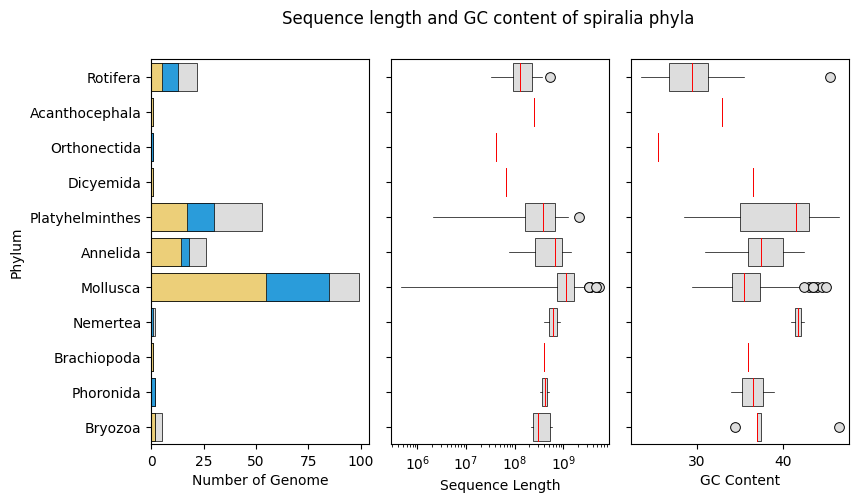

In [9]:
# Set up the plotting settings 
fig, axs = plt.subplots(nrows = 1, 
                        ncols = 3, 
                        figsize = (9,5), 
                        sharey = True, ) 

plt.subplots_adjust(wspace=0.1) 
plt.suptitle('Sequence length and GC content of spiralia phyla')
plt.subplots_adjust(hspace=.07)
plt.rcParams['figure.dpi'] = 500


props = {
    'boxprops' : {'facecolor' : '#dddddd', 'edgecolor' : 'black', 'linewidth' : 0.5}, 
    'medianprops': {'color' : 'red', 'linewidth' : 0.7}, 
    'whiskerprops' : {'color' : 'black', 'linewidth' : 0.5}, 
    'flierprops' : {'marker' : 'o', 'markerfacecolor' : '#dddddd', 
                    'markeredgecolor' : 'black', 'markeredgewidth' : .7, 
                    'markersize': 7}, 
}

########
# Plot Number of Genomes
########

sns.countplot(data = metadata, 
              y = 'Phylum', 
              ax = axs[0], 
              order = phylum_order, 
              color = '#dddddd',
              edgecolor = 'black',
              linewidth = 0.5)

sns.countplot(data = metadata.loc[(metadata.Sequencing_Type == 'Long read') 
                                  | (metadata.Sequencing_Type == 'Short read')], 
              y = 'Phylum', 
              ax = axs[0], 
              order = phylum_order, 
              color = '#0da5f7',
              edgecolor = 'black',
              linewidth = 0.5)

sns.countplot(data = metadata.loc[metadata.Sequencing_Type == 'Long read'], 
              y = 'Phylum', 
              ax = axs[0], 
              order = phylum_order, 
              color = '#ffd966',
              edgecolor = 'black',
              linewidth = 0.5)

axs[0].set_xlabel('Number of Genome') 

########
# Plot Sequence Length 
########
sns.boxplot(x='Total_Sequence_Length', 
            y='Phylum', 
            data = metadata, 
            showcaps = False, 
            ax=axs[1], 
            order = phylum_order, 
            **props)
axs[1].set_xlabel('Sequence Length')
axs[1].set_xscale('log')
axs[1].set_ylabel('')

########
## Plot GC Content 
########
sns.boxplot(x='GC_Percent', 
            y = 'Phylum', 
            data = metadata, 
            showcaps = False, 
            ax = axs[2], 
            order = phylum_order, 
            **props)

axs[2].set_xlabel('GC Content') 
axs[2].set_ylabel('')

In [10]:
# Save the figure as a pdf 
fig.savefig('Phylum_Counts.pdf', transparent=True, format = 'pdf', bbox_inches = 'tight', pad_inches = 0.25)